In [37]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import fetch_20newsgroups
import nltk
#nltk.download('wordnet')
#nltk.download('punkt')#, if you need "tokenizers/punkt/english.pickle", choose it
#nltk.download('averaged_perceptron_tagger')
np.random.seed(42)
import random
random.seed(42)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import nltk
#nltk.download()
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag



#dataset 

categories = ['comp.graphics', 'comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
train_dataset = fetch_20newsgroups(subset = 'train', categories = categories,
 shuffle = True, random_state = None)
test_dataset = fetch_20newsgroups(subset = 'test', categories = categories,
 shuffle = True, random_state = None)

#preprocessing step

wnl = nltk.wordnet.WordNetLemmatizer()

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

def lemmatize_sent_demo(text):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(nltk.word_tokenize(text))]
def lemmatize_sent(list_word):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]


#vectorize
tmp_vect = CountVectorizer(min_df=3, stop_words='english'
        ,token_pattern=r'(?u)\b[^\W\d_][^\W\d_][^\W\d_]+\b')
                           #,tokenizer=LemmaTokenizer())
X_train_tmp = tmp_vect.fit_transform(train_dataset.data)
print(X_train_tmp.shape)

X_test_tmp = tmp_vect.fit_transform(test_dataset.data)

#print(tmp_vect.get_feature_names())

#tfidf step

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_tmp)
X_test_tfidf = tfidf_transformer.fit_transform(X_test_tmp)
print(X_train_tfidf.shape)
print('-' * 20)
print(X_train_tmp.toarray()[:30,:5])
print('-' * 20)
print(X_train_tfidf.toarray()[:30,:5])



(4732, 15674)
(4732, 15674)
--------------------
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
--------------------
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]

In [38]:
##apply LSI block

#X_train_tfidf is the td-idf matrix
#kick imports to top later
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF

k = 50

#LSI portion
svd_info = TruncatedSVD(n_components=k)
train_lsi_matrix = svd_info.fit_transform(X_train_tfidf)
test_lsi_matrix = svd_info.fit_transform(X_test_tfidf)

#NMF portion
nmi_info = NMF(n_components=k)
train_nmf_matrix = nmi_info.fit_transform(X_train_tfidf)
test_nmf_matrix = nmi_info.fit_transform(X_test_tfidf)


print("Shape of LSI result: {}".format (train_lsi_matrix.shape))
print("Shape of NMF result: {}".format (train_nmf_matrix.shape))

Shape of LSI result: (4732, 50)
Shape of NMF result: (4732, 50)


In [26]:

###code cleanup in the future - saving this info
#https://stackoverflow.com/questions/15547409/how-to-get-rid-of-punctuation-using-nltk-tokenizer
words = nltk.word_tokenize(s)


import string
s = "... some string with can't  @.com 2032 punctuation ..."

words = nltk.word_tokenize(s)

words=[word.lower() for word in words if word.isalpha()]

print(words)
##loses "not" meaning from can't

['some', 'string', 'with', 'ca', 'punctuation']


Check train_dataset target labels
Multiclass target labels: [6 7 4 2 1 3 0 7 5 3 0 5 5 5 3 1 3 0 0 2]
Binary labels:[1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]

Test Set
Multiclass test labels:  [7 3 3 6 7 6 5 7 4 7 0 7 2 1 1 4 5 2 1 1]
Binary test labels: [1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0]
Soft Margin Model
Confusion Matrix:
[[   0 1560]
 [   0 1590]]
Accuracy: 0.504762
Recall: 1.000000
Precision: 0.504762
F1 Score: 0.670886

Hard Margin Model
Confusion Matrix:
[[ 625  935]
 [1371  219]]
Accuracy: 0.267937
Recall: 0.137736
Precision: 0.189775
F1 Score: 0.159621


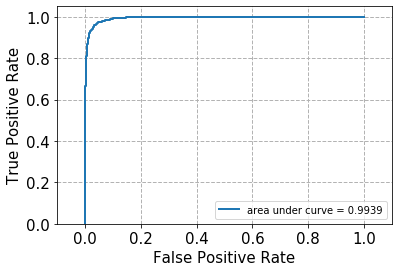

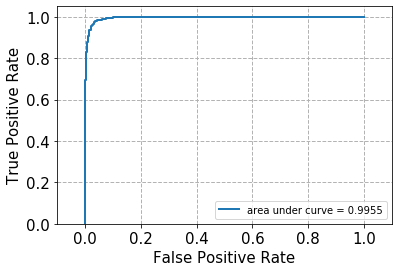

In [66]:
##Q4 

#classify documents into "Computer Technology" and "Recreational Activity"
#Computer tech - comp.graphics, comp.os.ms-windows.misc, comp.sys.ibm.pc.hardware, comp.sys.mac.hardware
#Recreational - rec.autos, rec.motorcycles, rec.sport.baseball, rec.sport.hockey
#USE LSI

from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics
from sklearn.base import BaseEstimator, TransformerMixin
class SparseToDenseArray(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def transform(self, X, *_):
        if hasattr(X, 'toarray'):
            return X.toarray()
        return X

    def fit(self, *_):
        return self
    

comp_categories = [ 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']
rec_categories = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
twenty_train = fetch_20newsgroups(subset='train', categories=comp_categories+rec_categories, shuffle=True, random_state=42,)
twenty_test = fetch_20newsgroups(subset='test', categories=comp_categories+rec_categories, shuffle=True, random_state=42,)


    
def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

def fit_predict_and_plot_roc(pipe, train_data, train_label, test_data, test_label):
    pipe.fit(train_data, train_label)
    # pipeline1.predict(twenty_test.data)

    if hasattr(pipe, 'decision_function'):
        prob_score = pipe.decision_function(test_data)
        fpr, tpr, _ = roc_curve(test_label, prob_score)
    else:
        prob_score = pipe.predict_proba(test_data)
        fpr, tpr, _ = roc_curve(test_label, prob_score[:,1])

    plot_roc(fpr, tpr)
    

    
#0-3 are computer category, 4-7 are not. change train_dataset.target to 0 and 1 for binary classification

binary_train_target_label=[]#0 means computer techonology and 1 means recreational activity
binary_test_target_label =[]
#computer is 0,1,2,3 in original target
computer__label = 0
#recreational is 4,5,6,7 in original target
recreational_label = 1


for i in train_dataset.target:
    if(i<4):
        binary_train_target_label.append(0)
    else:
        binary_train_target_label.append(1)

for i in test_dataset.target:
    if(i<4):
        binary_test_target_label.append(0)
    else:
        binary_test_target_label.append(1)
        
print("Check train_dataset target labels")
print("Multiclass target labels: " + str(train_dataset.target[0:20]))
print("Binary labels:" + str(binary_train_target_label[0:20]))
print("\nTest Set")
print("Multiclass test labels:  " + str(test_dataset.target[0:20]))
print("Binary test labels: " + str(binary_test_target_label[0:20]))
        

    
#redo LSI matrix for binary classification
k = 50
svd_info = TruncatedSVD(n_components=k)
train_lsi_matrix = svd_info.fit_transform(X_train_tfidf)
test_lsi_matrix = svd_info.fit_transform(X_test_tfidf)

soft_margin = 0.0001
hard_margin = 1000
soft_margin_model = svm.SVC(C=soft_margin, kernel='linear', random_state=42)
soft_margin_model.fit(train_lsi_matrix, binary_train_target_label)
soft_margin_predicted = soft_margin_model.predict(test_lsi_matrix)

hard_margin_model = svm.SVC(C=hard_margin, kernel='linear', random_state=42)
hard_margin_model.fit(train_lsi_matrix, binary_train_target_label)
hard_margin_predicted = hard_margin_model.predict(test_lsi_matrix)


soft_conf_matrix = metrics.confusion_matrix(binary_test_target_label, soft_margin_predicted) 
hard_conf_matrix = metrics.confusion_matrix(binary_test_target_label, hard_margin_predicted) 

print("Soft Margin Model")
print("Confusion Matrix:")
print(soft_conf_matrix)
print("Accuracy: {:.6f}".format(metrics.accuracy_score(binary_test_target_label, soft_margin_predicted)))
print("Recall: {:.6f}".format(metrics.recall_score(binary_test_target_label, soft_margin_predicted)))
print("Precision: {:.6f}".format(metrics.precision_score(binary_test_target_label, soft_margin_predicted)))
print("F1 Score: {:.6f}".format(metrics.f1_score(binary_test_target_label, soft_margin_predicted)))



print("\nHard Margin Model")
print("Confusion Matrix:")
print(hard_conf_matrix)
print("Accuracy: {:.6f}".format(metrics.accuracy_score(binary_test_target_label, hard_margin_predicted)))
print("Recall: {:.6f}".format(metrics.recall_score(binary_test_target_label, hard_margin_predicted)))
print("Precision: {:.6f}".format(metrics.precision_score(binary_test_target_label, hard_margin_predicted)))
print("F1 Score: {:.6f}".format(metrics.f1_score(binary_test_target_label, hard_margin_predicted)))


from sklearn.pipeline import Pipeline

pipeline1 = Pipeline([
    ('vect', CountVectorizer(min_df=3, stop_words='english'
        ,token_pattern=r'(?u)\b[^\W\d_][^\W\d_][^\W\d_]+\b')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=42)),
    ('toarr', SparseToDenseArray()),
    ('clf', SVC(kernel='linear', C=soft_margin, random_state=42)),
])

pipeline2 = Pipeline([
    ('vect', CountVectorizer(min_df=3, stop_words='english'
        ,token_pattern=r'(?u)\b[^\W\d_][^\W\d_][^\W\d_]+\b')),
    ('tfidf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=42)),
    ('toarr', SparseToDenseArray()),
    ('clf', SVC(kernel='linear', C=hard_margin, random_state=42)),
])


#fit_predict_and_plot_roc(pipeline1, train_dataset.data, train_dataset.target, test_dataset.data, test_dataset.target)
fit_predict_and_plot_roc(pipeline1, train_dataset.data, binary_train_target_label, test_dataset.data, binary_test_target_label)
fit_predict_and_plot_roc(pipeline2, train_dataset.data, binary_train_target_label, test_dataset.data, binary_test_target_label)


In [67]:
## 5 fold validation
from sklearn.model_selection import StratifiedKFold

gamma_values = [10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3]

best_gamma = 0
num_folds = 5

kfold = StratifiedKFold(n_splits=num_folds)
max_accuracy = 0

kfold_binary_train_target_label = np.array(binary_train_target_label)

for gamma in gamma_values:
    accuracy = 0
    varied_margin_model = SVC(C=gamma, kernel='linear')
    for train_index, label_index in kfold.split(train_lsi_matrix, kfold_binary_train_target_label):
        kfold_lsi_matrix = train_lsi_matrix[train_index]
        kfold_lsi_validation = train_lsi_matrix[label_index]
        kfold_binary_train = kfold_binary_train_target_label[train_index]
        kfold_binary_validation = kfold_binary_train_target_label[label_index]

        varied_margin_model.fit(kfold_lsi_matrix, kfold_binary_train)
        prediction = varied_margin_model.predict(kfold_lsi_validation)
        accuracy += metrics.accuracy_score(kfold_binary_validation, prediction)
        
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            best_gamma = gamma


print("Best gamma value:" +str(best_gamma))

best_gamma_model = svm.SVC(C=best_gamma, kernel='linear', random_state=42)
best_gamma_model.fit(train_lsi_matrix, binary_train_target_label)
best_gamma_predicted = best_gamma_model.predict(test_lsi_matrix)
best_gamma_conf_matrix = metrics.confusion_matrix(binary_test_target_label, best_gamma_predicted) 

print("\nMargin using Best Gamma Model")
print("Confusion Matrix:")
print(best_gamma_conf_matrix)
print("Accuracy: {:.6f}".format(metrics.accuracy_score(binary_test_target_label, best_gamma_predicted)))
print("Recall: {:.6f}".format(metrics.recall_score(binary_test_target_label, best_gamma_predicted)))
print("Precision: {:.6f}".format(metrics.precision_score(binary_test_target_label, best_gamma_predicted)))
print("F1 Score: {:.6f}".format(metrics.f1_score(binary_test_target_label, best_gamma_predicted)))



Best gamma value:100

Margin using Best Gamma Model
Confusion Matrix:
[[ 587  973]
 [1369  221]]
Accuracy: 0.256508
Recall: 0.138994
Precision: 0.185092
F1 Score: 0.158764


In [ ]:
##use for code reference

    
#make it into a pipeline like TA
tmp_vect = CountVectorizer(min_df=3, stop_words='english'
        ,token_pattern=r'(?u)\b[^\W\d_][^\W\d_][^\W\d_]+\b')
                           #,tokenizer=LemmaTokenizer())
X_train_tmp = tmp_vect.fit_transform(train_dataset.data)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_tmp)
k = 50

svd_info = TruncatedSVD(n_components=k)
train_lsi_matrix = svd_info.fit_transform(X_train_tfidf)
test_lsi_matrix = svd_info.fit_transform(X_test_tfidf)
soft_margin_model = svm.SVC(C=soft_margin, kernel='linear', random_state=42)
soft_margin_model.fit(train_lsi_matrix, binary_train_target_label)
soft_margin_predicted = soft_margin_model.predict(test_lsi_matrix)

